In [ ]:

from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:

import os
import cv2
import random
from tqdm import tqdm
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score, KFold
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
Trained_Images_Path = "/content/CIFAR-10-images/test"
Test_Images_Path = "/content/CIFAR-10-images/train"

Trained_Image_Folders = os.listdir(Trained_Images_Path)
Trained_Images = []

# Load all training imgaes and converted to grayscale
for x in Trained_Image_Folders:
    path = os.path.join(Trained_Images_Path, x)
    for img in tqdm(os.listdir(path)):
        img_arr = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
        img_arr_resize = cv2.resize(img_arr, (32, 32))  # Resized to 32x32
        # Flatten the image into a 1D array
        img_arr_flat = img_arr_resize.flatten()
        Trained_Images.append((img_arr_flat, Trained_Image_Folders.index(x)))

random.shuffle(Trained_Images)
# Prepare X and Y for training data
X = [item[0] for item in Trained_Images]
Y = [item[1] for item in Trained_Images]



100%|██████████| 1000/1000 [00:00<00:00, 12068.59it/s]


In [ ]:
Test_data = []

# Load all testing imgaes and converted to grayscale
for x in Trained_Image_Folders:
    path = os.path.join(Test_Images_Path, x)
    for img in tqdm(os.listdir(path)):
        img_arr = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
        img_arr_resize = cv2.resize(img_arr, (32, 32))  # Resized to 32x32
        # Flatten the image into a 1D array
        img_arr_flat = img_arr_resize.flatten()
        Test_data.append((img_arr_flat, Trained_Image_Folders.index(x)))
random.shuffle(Test_data)

100%|██████████| 5000/5000 [00:00<00:00, 7087.44it/s]


In [ ]:

manhattan_avg_accuracy_results = []
euclidean_avg_accuracy_results = []


k_values = [1, 3, 5, 7, 9]


for k in tqdm(k_values):
    knn_manhattan = KNeighborsClassifier(n_neighbors=k, p=1)
    knn_euclidean = KNeighborsClassifier(n_neighbors=k, p=2)


    kfold = KFold(n_splits=5)
    scores_manhattan = cross_val_score(knn_manhattan, X, Y, cv=kfold)
    scores_euclidean = cross_val_score(knn_euclidean, X, Y, cv=kfold)

    manhattan_avg_accuracy_results.append(np.mean(scores_manhattan))
    euclidean_avg_accuracy_results.append(np.mean(scores_euclidean))


100%|██████████| 5/5 [08:29<00:00, 101.81s/it]


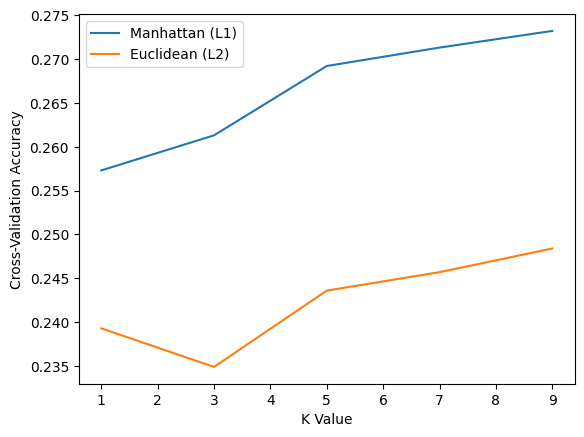

In [ ]:
plt.plot(k_values, manhattan_avg_accuracy_results, label='Manhattan (L1)')
plt.plot(k_values, euclidean_avg_accuracy_results, label='Euclidean (L2)')
plt.xlabel('K Value')
plt.ylabel('Cross-Validation Accuracy')
plt.legend()
plt.show()

0it [00:00, ?it/s]

Originial Image 1: 2
Top 5 Predictions:
1: Class 2
2: Class 9
3: Class 4
4: Class 4
5: Class 9




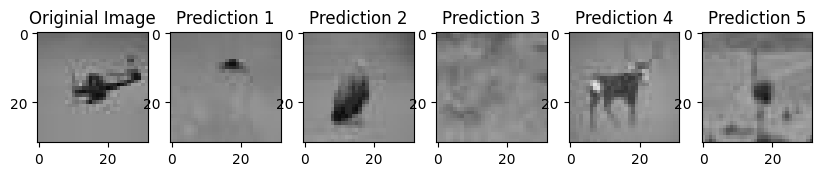

1it [00:00,  1.11it/s]

Originial Image 2: 8
Top 5 Predictions:
1: Class 9
2: Class 8
3: Class 7
4: Class 5
5: Class 2




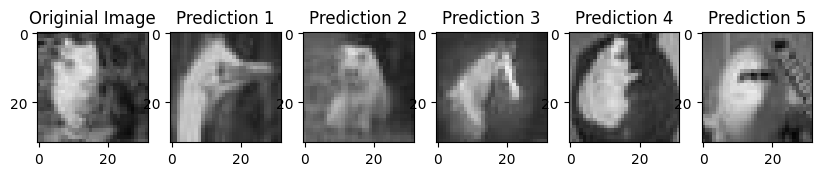

2it [00:01,  1.21it/s]

Originial Image 3: 7
Top 5 Predictions:
1: Class 7
2: Class 4
3: Class 7
4: Class 8
5: Class 0




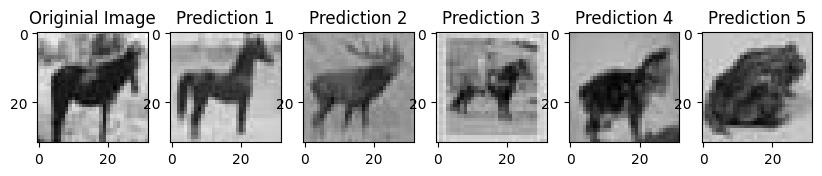

3it [00:02,  1.24it/s]

Originial Image 4: 0
Top 5 Predictions:
1: Class 0
2: Class 9
3: Class 9
4: Class 2
5: Class 2




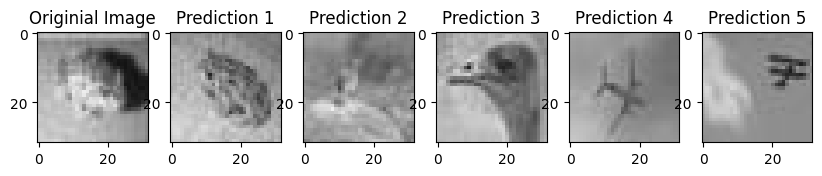

4it [00:03,  1.24it/s]

Originial Image 5: 4
Top 5 Predictions:
1: Class 4
2: Class 2
3: Class 7
4: Class 6
5: Class 6




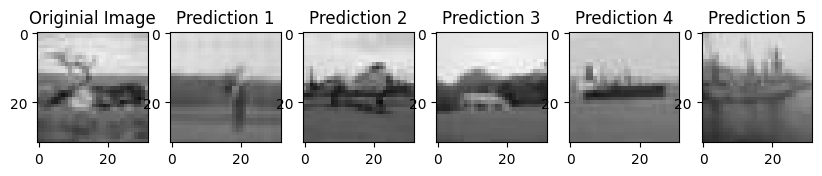

5it [00:04,  1.24it/s]

Originial Image 6: 6
Top 5 Predictions:
1: Class 6
2: Class 6
3: Class 6
4: Class 6
5: Class 6




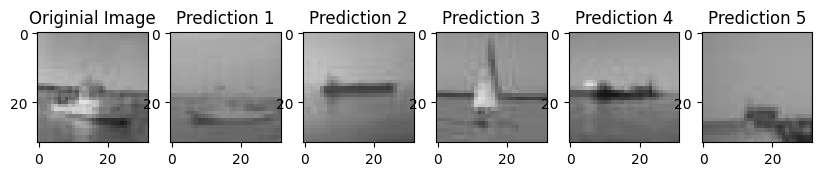

6it [00:05,  1.17it/s]

Originial Image 7: 1
Top 5 Predictions:
1: Class 1
2: Class 1
3: Class 7
4: Class 1
5: Class 7




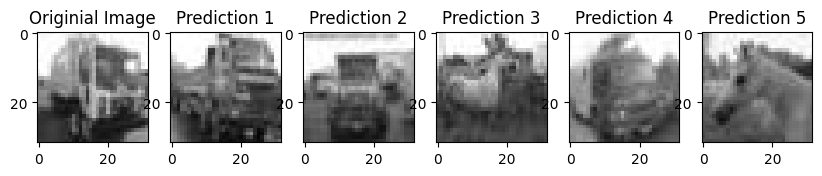

7it [00:06,  1.10it/s]

Originial Image 8: 1
Top 5 Predictions:
1: Class 1
2: Class 7
3: Class 7
4: Class 4
5: Class 3




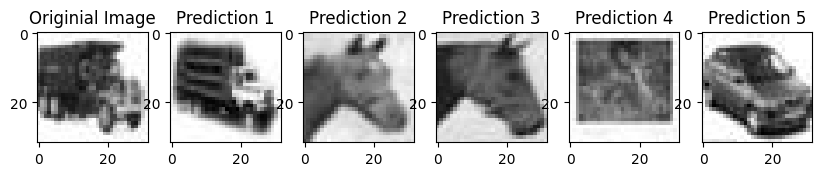

8it [00:07,  1.01s/it]

Originial Image 9: 4
Top 5 Predictions:
1: Class 0
2: Class 5
3: Class 9
4: Class 2
5: Class 0




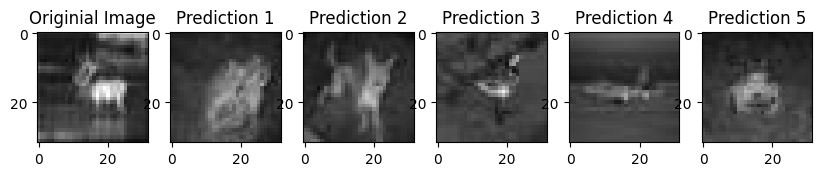

9it [00:08,  1.06s/it]

Originial Image 10: 9
Top 5 Predictions:
1: Class 8
2: Class 8
3: Class 0
4: Class 8
5: Class 9




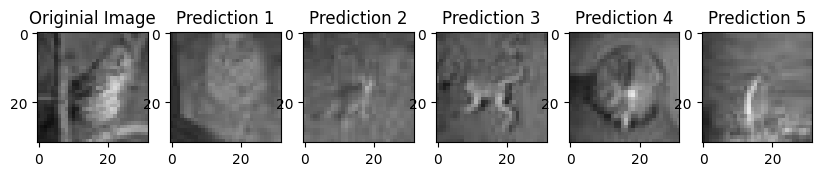

10it [00:09,  1.08s/it]

Originial Image 11: 8
Top 5 Predictions:
1: Class 6
2: Class 2
3: Class 9
4: Class 9
5: Class 0




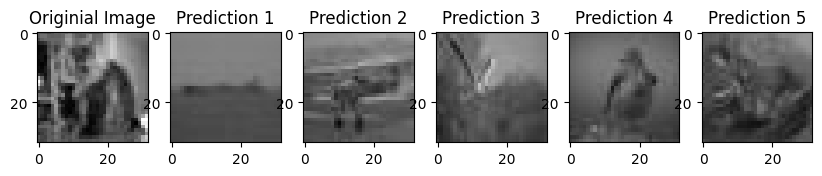

11it [00:10,  1.12s/it]

Originial Image 12: 8
Top 5 Predictions:
1: Class 8
2: Class 4
3: Class 9
4: Class 2
5: Class 9




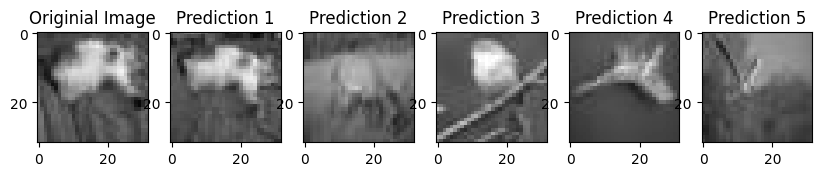

12it [00:11,  1.12s/it]

Originial Image 13: 2
Top 5 Predictions:
1: Class 0
2: Class 0
3: Class 1
4: Class 2
5: Class 3




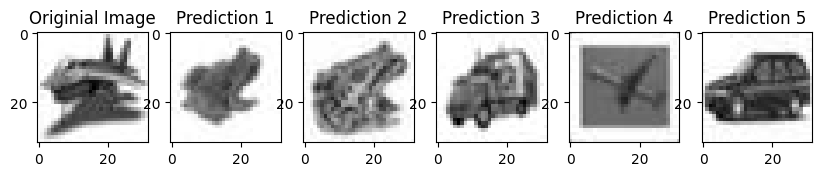

13it [00:12,  1.02s/it]

Originial Image 14: 6
Top 5 Predictions:
1: Class 0
2: Class 2
3: Class 6
4: Class 1
5: Class 6




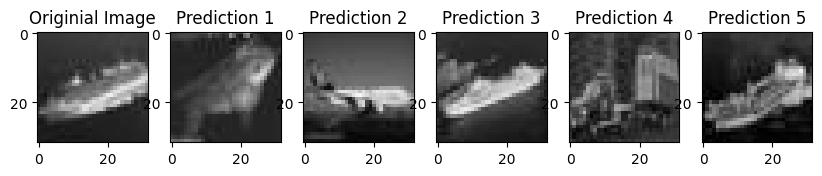

14it [00:13,  1.05it/s]

Originial Image 15: 8
Top 5 Predictions:
1: Class 7
2: Class 3
3: Class 2
4: Class 3
5: Class 3




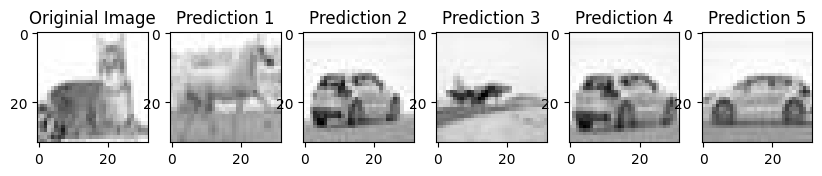

15it [00:14,  1.12it/s]

Originial Image 16: 0
Top 5 Predictions:
1: Class 0
2: Class 9
3: Class 7
4: Class 4
5: Class 2




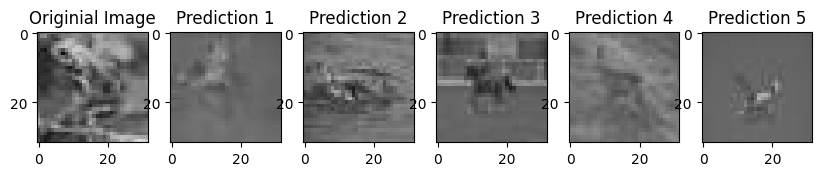

16it [00:14,  1.17it/s]

Originial Image 17: 0
Top 5 Predictions:
1: Class 5
2: Class 9
3: Class 9
4: Class 4
5: Class 9




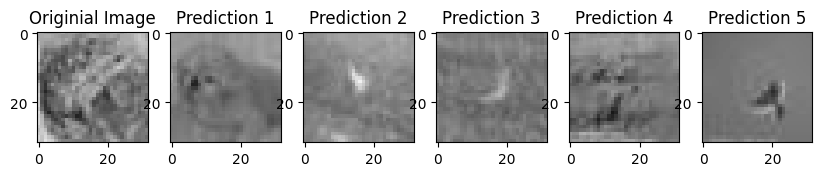

17it [00:15,  1.14it/s]

Originial Image 18: 4
Top 5 Predictions:
1: Class 2
2: Class 2
3: Class 9
4: Class 9
5: Class 0




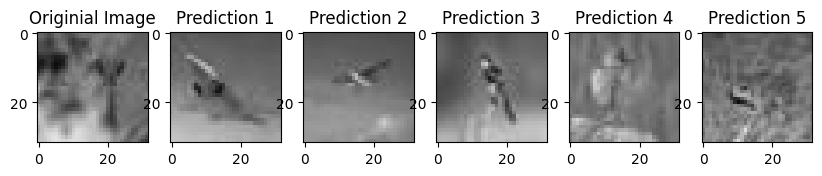

18it [00:16,  1.18it/s]

Originial Image 19: 7
Top 5 Predictions:
1: Class 9
2: Class 4
3: Class 9
4: Class 9
5: Class 4




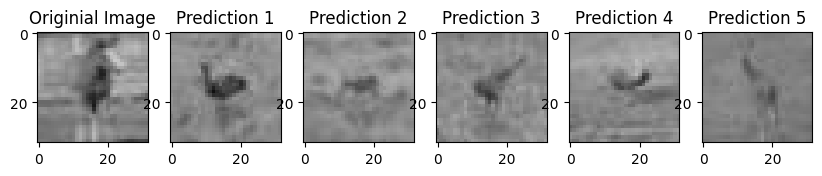

19it [00:17,  1.20it/s]

Originial Image 20: 2
Top 5 Predictions:
1: Class 2
2: Class 4
3: Class 2
4: Class 9
5: Class 9




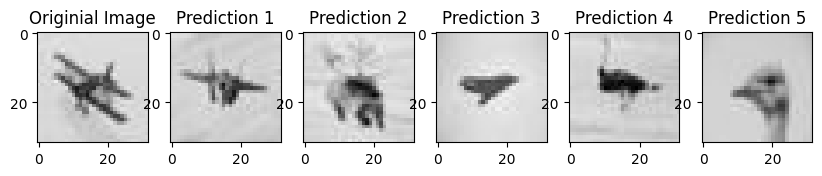

19it [00:18,  1.04it/s]


In [ ]:
from numpy.ma.core import count
Z = [item[0] for item in Test_data]
test_images = np.array(Z)

k_values = [1, 3, 5, 7, 9]
knn_model = KNeighborsClassifier(n_neighbors=5, metric='manhattan')
knn_model.fit(X, Y)
predictions = knn_model.predict(test_images)

count = 0
for i, test_img in tqdm(enumerate(Test_data)):
    print(f"Originial Image {i + 1}: {test_img[1]}")
    print("Top 5 Predictions:")
    distances, indices = knn_model.kneighbors([test_images[i]], n_neighbors=5)
    for j, index in enumerate(indices[0]):
        print(f"{j + 1}: Class {Y[index]}")
    print("\n")

    plt.figure(figsize=(10,4))
    plt.subplot(1, 6, 1)
    plt.title("Originial Image")
    original_image = test_img[0].reshape(32,32)

    plt.imshow(original_image, cmap='gray', vmin=0, vmax=255)
    for j, index in enumerate(indices[0]):
        plt.subplot(1, 6, j + 2)
        plt.title(f"Prediction {j + 1}")
        original_image = X[index].reshape(32,32)
        plt.imshow(original_image, cmap='gray', vmin=0, vmax=255)
    plt.show()

    count += 1
    if(count>19):break